In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl

for _mod in [np, sc, mpl]:
    print(_mod.__name__, _mod.__version__)

numpy 1.20.1
scipy 1.6.1
matplotlib 3.3.4


In [2]:
import scipy.stats as st
from matplotlib import pylab as plt

<div class="alert alert-block alert-danger">
    <b>Task001:</b> Flipping coins
    <p>Demonstrate the bayesian inference on simple flipping coins scenario.</p>
    <p>Imagine we have to test the fairnes of an unfair coin (odd/even balance is 80/20) under initial belief the coin is fairly balanced (odd/even balance is 50/50). Demonstrate the process of learning the true fairness of a coin by applying bayesian inference</p>
</div>

In [131]:
# We have coin with odd/even sides so: 1 parameter having 2 outcomes, so we take binomial distribution with n=1
# The size here affects how strong the belief
# Less samples will result in higher standard deviation, hence weaker belief
assumption_samples = np.random.binomial(n=1, p=.5, size=100)
measurements = np.random.binomial(n=1, p=.8, size=1000)

In [123]:
measurements_t2 = np.random.binomial(n=1, p=.8, size=20)

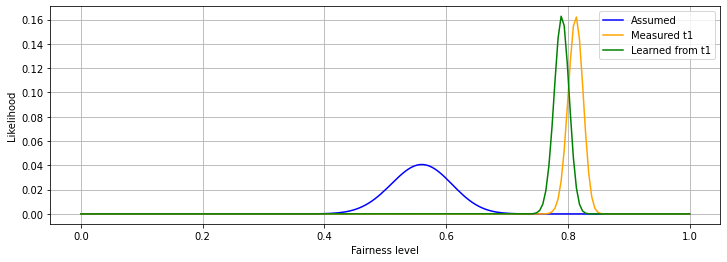

In [143]:
fairness_levels = np.linspace(0.,1.,200) # The size here controls the smoothnes of the curve

# Assumption of the coin fainess is .5 ... let it be rather moderate belief based on 100 samples
assumption_level_prob = np.asarray([np.product(st.bernoulli.pmf(assumption_samples, l)) for l in fairness_levels])
assumption_levels_likelihood = assumption_level_prob / np.sum(assumption_level_prob)

# In reality the coin is biassed .8 ... we have to test the coin still believing we have it fair .5
measurements_prob = np.asarray([np.product(st.bernoulli.pmf(measurements, l)) for l in fairness_levels])
measurements_likelihood = measurements_prob / np.sum(measurements_prob)

# Learning
learned_probs = assumption_level_prob * measurements_prob
learned_likelihood = learned_probs / np.sum(learned_probs)

measurements_prob_t2 = np.asarray([np.product(st.bernoulli.pmf(measurements_t2, l)) for l in fairness_levels])
measurements_likelihood_t2 = measurements_prob_t2 / np.sum(measurements_prob_t2)

# Learning t2
learned_probs_t2 = learned_probs * measurements_prob_t2
learned_likelihood_t2 = learned_probs_t2 / np.sum(learned_probs_t2)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(fairness_levels, assumption_levels_likelihood, label='Assumed', color='blue')
plt.plot(fairness_levels, measurements_likelihood, label='Measured t1', color='orange')
# plt.plot(fairness_levels, measurements_likelihood_t2, label='Measured t2', color='orange')
plt.plot(fairness_levels, learned_likelihood, label='Learned from t1', color='green')
# plt.plot(fairness_levels, learned_likelihood_t2, label='Learned from t1 and t2', color='green')
plt.xlabel('Fairness level')
plt.ylabel('Likelihood')
plt.legend(loc=0)
plt.grid()

<div class="alert alert-block alert-info">
<b>Task001 verification:</b> The results of learning with different amount of measurements
</div>

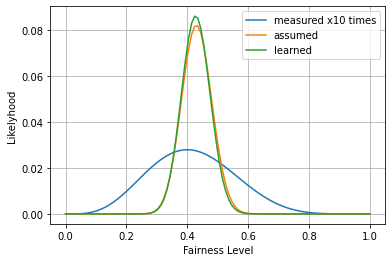

In [102]:
# TODO: improvise the plotting

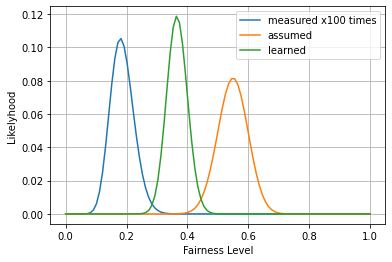

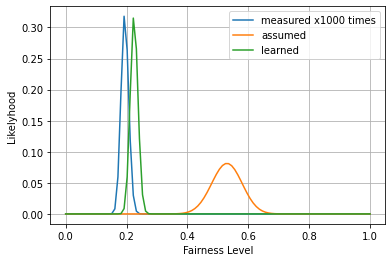

<div class="alert alert-block alert-warning">
    <b>Extra:</b> Three doors game
</div>

<div class="alert alert-block alert-warning">
    <b>Extra: </b> Estimating the mode of transportation
</div>

In [133]:
import pandas as pd

In [136]:
df = pd.read_csv('synth_mobility_wgs84.csv')

In [137]:
df

,epoch,id,lat,lon,mod,speed
0,0,93,58.379306,26.670680,1,0.000
1,0,113,58.384715,26.670892,2,0.000
2,0,298,58.356229,26.714594,4,0.000
3,0,303,58.366927,26.607089,5,0.000
4,0,307,58.380028,26.653607,6,0.000
...,...,...,...,...,...,...
882922,14835,281,58.364580,26.905873,3,4.830
882923,14836,281,58.364589,26.905856,3,4.992
882924,14837,281,58.364599,26.905836,3,5.753
882925,14838,281,58.364608,26.905817,3,5.455
